#Study Attrition based on input features

**Read Dataset**

In [0]:
import pandas as pd
df = pd.read_excel('ML_Study_Data_v1.0.xlsx')
df_test = pd.read_excel('ML_Test_Data_v1.0.xlsx')

**Examine the data**

In [0]:
df.head()

,ID,Result,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,Location,S_Date,LOS_Years \n(Today() - S_Date),C_R,P_R
0,1000,No,4,"2 year(s), 0 month(s), 27 day(s)",16 Specialist,0.709,2018-01-01,IOC01 - Olympia Technology Park,2009-12-07,9.810959,2.0,2.0
1,1001,Attriion,3,"1 year(s), 6 month(s), 6 day(s)",18 Entry,0.921,2017-02-22,IOC01 - Olympia Technology Park,2017-02-22,2.594521,2.0,NaN
2,1002,No,3,"1 year(s), 9 month(s), 27 day(s)",18 Entry,0.821,2018-01-01,IOC01 - Olympia Technology Park,2016-08-22,3.098630,3.0,NaN
3,1003,No,4,"3 year(s), 0 month(s), 2 day(s)",17 Intermediate,0.751,2018-01-01,IOC01 - Olympia Technology Park,2015-08-26,4.090411,3.0,2.0
4,1004,Attriion,4,"4 year(s), 9 month(s), 27 day(s)",17 Intermediate,0.971,2016-02-01,IOC01 - Olympia Technology Park,2010-06-09,9.306849,3.0,2.0


In [0]:
df['Result'].replace({'Attriion':1, 'No':0}, inplace=True)
df['Result'].shape

(266,)

**Copy the *Result* column into a new series. This would be come the labels of the models later**

**Drop the *Result* and the *Location* columns**

In [0]:
result = df['Result'].copy()
df.drop(['Location', 'Result'], inplace=True, axis=1)
df_test.drop(['Location'], inplace=True, axis=1)

**Drop the ID column**

In [0]:
df_ID = df['ID']
df_test_ID = df_test['ID']
df.drop('ID', axis=1, inplace=True)
df_test.drop('ID', axis=1, inplace=True)

In [0]:
df.head()

,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,S_Date,LOS_Years \n(Today() - S_Date),C_R,P_R
0,4,"2 year(s), 0 month(s), 27 day(s)",16 Specialist,0.709,2018-01-01,2009-12-07,9.810959,2.0,2.0
1,3,"1 year(s), 6 month(s), 6 day(s)",18 Entry,0.921,2017-02-22,2017-02-22,2.594521,2.0,NaN
2,3,"1 year(s), 9 month(s), 27 day(s)",18 Entry,0.821,2018-01-01,2016-08-22,3.098630,3.0,NaN
3,4,"3 year(s), 0 month(s), 2 day(s)",17 Intermediate,0.751,2018-01-01,2015-08-26,4.090411,3.0,2.0
4,4,"4 year(s), 9 month(s), 27 day(s)",17 Intermediate,0.971,2016-02-01,2010-06-09,9.306849,3.0,2.0


In [0]:
df_test.head()

,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,S_Date,LOS_Years \n(Today() - S_Date),C_R,P_R
0,4,"2 year(s), 0 month(s), 27 day(s)",16 Specialist,0.709,2018-01-01,2009-12-07,9.810959,2.0,2.0
1,3,"1 year(s), 6 month(s), 6 day(s)",18 Entry,0.921,2017-02-22,2017-02-22,2.594521,2.0,NaN
2,3,"1 year(s), 9 month(s), 27 day(s)",18 Entry,0.821,2018-01-01,2016-08-22,3.098630,3.0,NaN
3,4,"3 year(s), 0 month(s), 2 day(s)",17 Intermediate,0.751,2018-01-01,2015-08-26,4.090411,3.0,2.0
4,4,"4 year(s), 9 month(s), 27 day(s)",17 Intermediate,0.971,2016-02-01,2010-06-09,9.306849,3.0,2.0


**It looks like S_Date and LOS_Years are same data expressed differently.** 
**Let's remove S_Date as LOS_Years seems better usable**

In [0]:
df.drop('S_Date', axis=1, inplace=True)
df_test.drop('S_Date', axis=1, inplace=True)

In [0]:
df.head()

,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,LOS_Years \n(Today() - S_Date),C_R,P_R
0,4,"2 year(s), 0 month(s), 27 day(s)",16 Specialist,0.709,2018-01-01,9.810959,2.0,2.0
1,3,"1 year(s), 6 month(s), 6 day(s)",18 Entry,0.921,2017-02-22,2.594521,2.0,NaN
2,3,"1 year(s), 9 month(s), 27 day(s)",18 Entry,0.821,2018-01-01,3.098630,3.0,NaN
3,4,"3 year(s), 0 month(s), 2 day(s)",17 Intermediate,0.751,2018-01-01,4.090411,3.0,2.0
4,4,"4 year(s), 9 month(s), 27 day(s)",17 Intermediate,0.971,2016-02-01,9.306849,3.0,2.0


In [0]:
df_test.head()

,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,LOS_Years \n(Today() - S_Date),C_R,P_R
0,4,"2 year(s), 0 month(s), 27 day(s)",16 Specialist,0.709,2018-01-01,9.810959,2.0,2.0
1,3,"1 year(s), 6 month(s), 6 day(s)",18 Entry,0.921,2017-02-22,2.594521,2.0,NaN
2,3,"1 year(s), 9 month(s), 27 day(s)",18 Entry,0.821,2018-01-01,3.098630,3.0,NaN
3,4,"3 year(s), 0 month(s), 2 day(s)",17 Intermediate,0.751,2018-01-01,4.090411,3.0,2.0
4,4,"4 year(s), 9 month(s), 27 day(s)",17 Intermediate,0.971,2016-02-01,9.306849,3.0,2.0


**Let's now strip the LOS_Years column name off some junk**

In [0]:
df.rename({'LOS_Years \n(Today() - S_Date)':'LOS_Years'}, axis=1, inplace=True)
df_test.rename({'LOS_Years \n(Today() - S_Date)':'LOS_Years'}, axis=1, inplace=True)

**Check the Data Types of each column**

In [0]:
df.dtypes

DXC_Level                   int64
Time_In_Profile            object
Legacy_Level               object
Compa-Ratio               float64
LPI_Date           datetime64[ns]
LOS_Years                 float64
C_R                       float64
P_R                       float64
dtype: object

**Check if there are null values in Data** - They are there in the *C_R* and the *P_R* columns.
I don't like null values :(

In [0]:
df.isna().sum()

DXC_Level           0
Time_In_Profile     0
Legacy_Level        0
Compa-Ratio         0
LPI_Date            0
LOS_Years           0
C_R                10
P_R                57
dtype: int64

The *Result* column takes values *Attriion* (*should be Attrition fat fingered*) and *No*. Let's give them labels *1* and *0* respectively 

In [0]:
df.sample()

,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,LOS_Years,C_R,P_R
162,4,"3 year(s), 1 month(s), 27 day(s)",17 Intermediate,0.851,2018-01-01,9.345205,2.0,2.0


In [0]:
df.head()

,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,LOS_Years,C_R,P_R
0,4,"2 year(s), 0 month(s), 27 day(s)",16 Specialist,0.709,2018-01-01,9.810959,2.0,2.0
1,3,"1 year(s), 6 month(s), 6 day(s)",18 Entry,0.921,2017-02-22,2.594521,2.0,NaN
2,3,"1 year(s), 9 month(s), 27 day(s)",18 Entry,0.821,2018-01-01,3.098630,3.0,NaN
3,4,"3 year(s), 0 month(s), 2 day(s)",17 Intermediate,0.751,2018-01-01,4.090411,3.0,2.0
4,4,"4 year(s), 9 month(s), 27 day(s)",17 Intermediate,0.971,2016-02-01,9.306849,3.0,2.0


**Strip the *Legacy_Level* column and keep the number part**

In [0]:
df['Legacy_Level'] = df['Legacy_Level'].str.split(expand=True)[0]
df_test['Legacy_Level'] = df_test['Legacy_Level'].str.split(expand=True)[0]

In [0]:
df.head(5)

,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,LOS_Years,C_R,P_R
0,4,"2 year(s), 0 month(s), 27 day(s)",16,0.709,2018-01-01,9.810959,2.0,2.0
1,3,"1 year(s), 6 month(s), 6 day(s)",18,0.921,2017-02-22,2.594521,2.0,NaN
2,3,"1 year(s), 9 month(s), 27 day(s)",18,0.821,2018-01-01,3.098630,3.0,NaN
3,4,"3 year(s), 0 month(s), 2 day(s)",17,0.751,2018-01-01,4.090411,3.0,2.0
4,4,"4 year(s), 9 month(s), 27 day(s)",17,0.971,2016-02-01,9.306849,3.0,2.0


**Convert *Time_In_Profile* and *LPI_Date* to numeric**

In [0]:
#Convert Time_In_Profile
s = df['Time_In_Profile'].str.split(expand=True)
df['Time_In_Profile'] = pd.to_numeric(s[0]) + pd.to_numeric(s[2])/12 + pd.to_numeric(s[4])/365
s_t = df_test['Time_In_Profile'].str.split(expand=True)
df_test['Time_In_Profile'] = pd.to_numeric(s_t[0]) + pd.to_numeric(s_t[2])/12 + pd.to_numeric(s_t[4])/365
#Convert LPI_Date
dt = pd.to_datetime(pd.datetime.now().date())
df['LPI_Date'] = pd.to_numeric(dt - pd.to_datetime(df['LPI_Date']))
df_test['LPI_Date'] = pd.to_numeric(dt - pd.to_datetime(df_test['LPI_Date']))

In [0]:
df.head()

,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,LOS_Years,C_R,P_R
0,4,2.073973,16,0.709,58320000000000000,9.810959,2.0,2.0
1,3,1.516438,18,0.921,85363200000000000,2.594521,2.0,NaN
2,3,1.823973,18,0.821,58320000000000000,3.098630,3.0,NaN
3,4,3.005479,17,0.751,58320000000000000,4.090411,3.0,2.0
4,4,4.823973,17,0.971,118800000000000000,9.306849,3.0,2.0


In [0]:
df_test.head()

,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,LOS_Years,C_R,P_R
0,4,2.073973,16,0.709,58320000000000000,9.810959,2.0,2.0
1,3,1.516438,18,0.921,85363200000000000,2.594521,2.0,NaN
2,3,1.823973,18,0.821,58320000000000000,3.098630,3.0,NaN
3,4,3.005479,17,0.751,58320000000000000,4.090411,3.0,2.0
4,4,4.823973,17,0.971,118800000000000000,9.306849,3.0,2.0


**Column C_R seem to contain not many null values as does P_R.**
**We'll retain the nulls as they can be handled by both KNN and RF**


In [0]:
df_superv = df.copy()

#df['P_R'][df['P_R'].isna()] = 0.0
#df_test['P_R'][df_test['P_R'].isna()] = 0.0

#df['C_R'][df['C_R'].isna()] = 0.0
#df_test['C_R'][df_test['C_R'].isna()] = 0.0



**Convert to categorical values of supervised learning**

In [0]:
df_superv['DXC_Level'] = df_superv['DXC_Level'].astype(pd.CategoricalDtype(ordered=False))
df_superv['Legacy_Level'] = df_superv['Legacy_Level'].astype(pd.CategoricalDtype(ordered=False))
df_superv['C_R'] = df_superv['C_R'].astype(pd.CategoricalDtype(ordered=False))
df_superv['P_R'] = df_superv['P_R'].astype(pd.CategoricalDtype(ordered=False))
df_superv["Result"] = pd.Series(result)
df_superv['Result'] = df_superv['Result'].astype(pd.CategoricalDtype(ordered=False))

In [0]:
df.head()

,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,LOS_Years,C_R,P_R
0,4,2.073973,16,0.709,58320000000000000,9.810959,2.0,2.0
1,3,1.516438,18,0.921,85363200000000000,2.594521,2.0,NaN
2,3,1.823973,18,0.821,58320000000000000,3.098630,3.0,NaN
3,4,3.005479,17,0.751,58320000000000000,4.090411,3.0,2.0
4,4,4.823973,17,0.971,118800000000000000,9.306849,3.0,2.0


In [0]:
df_test.head()

,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,LOS_Years,C_R,P_R
0,4,2.073973,16,0.709,58320000000000000,9.810959,2.0,2.0
1,3,1.516438,18,0.921,85363200000000000,2.594521,2.0,NaN
2,3,1.823973,18,0.821,58320000000000000,3.098630,3.0,NaN
3,4,3.005479,17,0.751,58320000000000000,4.090411,3.0,2.0
4,4,4.823973,17,0.971,118800000000000000,9.306849,3.0,2.0


**Standardized the data (remove the mean and scale to unit variance)**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_test_scaled = scaler.fit_transform(df_test)
pd.DataFrame(df_test_scaled)


,0,1,2,3,4,5,6,7
0,0.589506,-0.842038,-1.119409,-0.325657,-0.500962,0.919802,-0.131812,0.568142
1,-1.010582,-1.254127,0.789327,0.393418,1.022101,-1.237033,-0.131812,NaN
2,-1.010582,-1.026820,0.789327,0.054232,-0.500962,-1.086366,1.335315,NaN
3,0.589506,-0.153535,-0.165041,-0.183199,-0.500962,-0.789945,1.335315,0.568142
4,0.589506,1.190564,-0.165041,0.563012,2.905250,0.769135,1.335315,0.568142
...,...,...,...,...,...,...,...,...
261,-1.010582,-0.595662,0.789327,-0.047524,0.988039,-0.816966,-0.131812,0.568142
262,-1.010582,-0.595662,0.789327,-0.050916,0.988039,-0.834162,-0.131812,0.568142
263,-1.010582,-1.026820,0.789327,-0.006822,-0.500962,-0.342856,-0.131812,-1.760125
264,0.589506,1.190564,-1.119409,0.101718,-0.500962,0.625837,-0.131812,0.568142


In [0]:
pd.DataFrame(df_scaled).head(5)

,0,1,2,3,4,5,6,7
0,0.589506,-0.842038,-1.119409,-0.325657,-0.500962,0.919802,-0.131812,0.568142
1,-1.010582,-1.254127,0.789327,0.393418,1.022101,-1.237033,-0.131812,NaN
2,-1.010582,-1.026820,0.789327,0.054232,-0.500962,-1.086366,1.335315,NaN
3,0.589506,-0.153535,-0.165041,-0.183199,-0.500962,-0.789945,1.335315,0.568142
4,0.589506,1.190564,-0.165041,0.563012,2.905250,0.769135,1.335315,0.568142


In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df_scaled = imp.fit_transform(df_scaled)
df_test_scaled = imp.fit_transform(df_test_scaled)
pd.DataFrame(df_scaled).head(5)

,0,1,2,3,4,5,6,7
0,0.589506,-0.842038,-1.119409,-0.325657,-0.500962,0.919802,-0.131812,5.681415e-01
1,-1.010582,-1.254127,0.789327,0.393418,1.022101,-1.237033,-0.131812,6.799452e-17
2,-1.010582,-1.026820,0.789327,0.054232,-0.500962,-1.086366,1.335315,6.799452e-17
3,0.589506,-0.153535,-0.165041,-0.183199,-0.500962,-0.789945,1.335315,5.681415e-01
4,0.589506,1.190564,-0.165041,0.563012,2.905250,0.769135,1.335315,5.681415e-01


**Combine the test, train and bring back ID**

In [0]:
df_comb_ID = pd.concat([df_ID, pd.DataFrame(df_scaled)], axis=1)
df_test_comb_ID = pd.concat([df_test_ID, pd.DataFrame(df_test_scaled)], axis=1)
df_comb = pd.concat([df_comb_ID, df_test_comb_ID], ignore_index=True)
df_comb_tot_ID = df_comb['ID']
df_comb.drop('ID', axis=1, inplace=True)

#Summon the "Unsupervised" brother first!
**K-means**

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.03s	1298	0.011	0.007	0.009	0.010	0.004	0.254
random   	0.03s	1304	0.021	0.014	0.017	0.032	0.012	0.266
PCA-based	0.00s	1317	0.006	0.004	0.005	-0.008	0.000	0.252
__________________________________________________________________________________


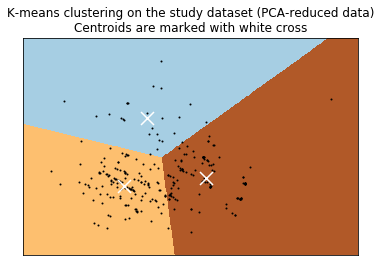

In [0]:
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

data = df_scaled
n_digits = 3
labels = result

sample_size = result.count()

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    return(labels, estimator.labels_)
est1 = bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)
df_comp1 = pd.DataFrame(est1)

est2 =  KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
df_comp_tot = est2.fit(df_comb).labels_

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the study dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [0]:
df_comp1_X = df_comp1.transpose()
df_comp1_X.rename(columns={ df_comp1_X.columns[1]: "cluster_number"}, inplace=True)
df_comp1_X.head(10)

,Result,cluster_number
0,0,1
1,1,0
2,0,0
3,0,0
4,1,1
5,1,2
6,0,0
7,1,0
8,1,1
9,0,0


In [0]:

df_comp1_X['idx'] = df_comp1_X.index
a = df_comp1_X.groupby(['cluster_number', 'Result']).count().reset_index()
cluster_sum = a.groupby(['cluster_number']).sum().idx.reset_index()

**Here are the attrition probablilities**

In [0]:
#probability scores if your data is in a particular cluster
for i in cluster_sum['cluster_number'].values:
  x = a.loc[(a['cluster_number'] == i) & (a['Result'] == 1.0 )]['idx']
  y = cluster_sum.loc[cluster_sum['cluster_number'] == i]['idx']
  p = x.values[0]/y.values[0]
  print('Attrition probability in cluster %d = %d percent' %(i, p*100))

Attrition probability in cluster 0 = 41 percent
Attrition probability in cluster 1 = 29 percent
Attrition probability in cluster 2 = 39 percent


In [0]:
df["Result"] = df_comp1_X['Result']
df["cluster"] = df_comp1_X['cluster_number']

In [0]:
df_comp_tot_X = df_comp_tot.transpose()
df_final_clus = pd.concat([df_comb_tot_ID, pd.DataFrame(df_comp_tot_X)], axis=1)
df_final_clus.rename({df_final_clus.columns[1]:'Cluster'}, axis=1, inplace=True)
df_final_clus.head(10)

,ID,Cluster
0,1000,1
1,1001,2
2,1002,2
3,1003,1
4,1004,1
5,1005,0
6,1006,2
7,1007,2
8,1008,1
9,1009,2


In [0]:
df_final_clus.loc[df_final_clus['ID'] == 1009]

,ID,Cluster
9,1009,2
275,1009,2


In [0]:
#df['cluster'][87]
df.index[df["cluster"] == 0]

Int64Index([  1,   2,   3,   6,   7,   9,  13,  18,  19,  20,
            ...
            249, 251, 254, 255, 258, 260, 261, 262, 263, 265],
           dtype='int64', length=119)

**Check what cluster 

In [0]:
df['cluster'][91]

0

In [0]:
pd.Series(result)[242]

0

#Try Supervised

In [0]:
result.values

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1])

In [0]:
pd.DataFrame(df_scaled)

,0,1,2,3,4,5,6,7
0,0.589506,-0.842038,-1.119409,-0.325657,-0.500962,0.919802,-0.131812,5.681415e-01
1,-1.010582,-1.254127,0.789327,0.393418,1.022101,-1.237033,-0.131812,6.799452e-17
2,-1.010582,-1.026820,0.789327,0.054232,-0.500962,-1.086366,1.335315,6.799452e-17
3,0.589506,-0.153535,-0.165041,-0.183199,-0.500962,-0.789945,1.335315,5.681415e-01
4,0.589506,1.190564,-0.165041,0.563012,2.905250,0.769135,1.335315,5.681415e-01
...,...,...,...,...,...,...,...,...
261,-1.010582,-0.595662,0.789327,-0.047524,0.988039,-0.816966,-0.131812,5.681415e-01
262,-1.010582,-0.595662,0.789327,-0.050916,0.988039,-0.834162,-0.131812,5.681415e-01
263,-1.010582,-1.026820,0.789327,-0.006822,-0.500962,-0.342856,-0.131812,-1.760125e+00
264,0.589506,1.190564,-1.119409,0.101718,-0.500962,0.625837,-0.131812,5.681415e-01


In [0]:
'''
df_superv = pd.DataFrame(df_scaled).copy()
df_superv["Result"] = pd.Series(result)
df_superv['Result'] = df_superv['Result'].astype(pd.CategoricalDtype(ordered=False))
df_superv.reset_index(inplace=True)
df_superv.drop(columns='index', inplace=True)
df_superv.head()
'''

'\ndf_superv = pd.DataFrame(df_scaled).copy()\ndf_superv["Result"] = pd.Series(result)\ndf_superv[\'Result\'] = df_superv[\'Result\'].astype(pd.CategoricalDtype(ordered=False))\ndf_superv.reset_index(inplace=True)\ndf_superv.drop(columns=\'index\', inplace=True)\ndf_superv.head()\n'

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(df_superv.iloc[:,:-1], df_superv['Result'], random_state=1)

In [0]:
def riX(X):
  X.reset_index(inplace=True)
  X.drop(columns="index", inplace=True)
riX(X_train)
riX(X_validate)

In [0]:
y_train = y_train.reset_index()
y_train = y_train["Result"]

y_validate = y_validate.reset_index()
y_validate = y_validate["Result"]

In [0]:
X_validate.head()

,DXC_Level,Time_In_Profile,Legacy_Level,Compa-Ratio,LPI_Date,LOS_Years,C_R,P_R
0,3,1.788356,18,0.000,58320000000000000,2.868493,3.0,NaN
1,4,3.323973,16,0.874,84758400000000000,9.153425,2.0,1.0
2,4,3.157306,16,0.750,58320000000000000,9.172603,2.0,2.0
3,4,2.705023,17,1.050,58320000000000000,3.789041,2.0,2.0
4,5,2.907306,16,0.746,58320000000000000,13.147945,2.0,2.0


In [0]:
y_validate.head()

0    0
1    0
2    1
3    0
4    0
Name: Result, dtype: category
Categories (2, int64): [0, 1]

In [0]:
#back up regression dataframes
X_train_bk, y_train_bk, X_validate_bk, y_validate_bk = X_train, y_train, X_validate, y_validate

#Random forest Regression

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

y_train = lb.fit_transform(y_train)
# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(n_estimators=150,random_state=1)
rf_model.fit(X_train, y_train)
rf_val_predictions = rf_model.predict(X_validate)
#rf_val_mae = mean_absolute_error(rf_val_predictions, y_validate)
rf_val_predictions = lb.inverse_transform(rf_val_predictions)

ValueError: ignored

In [0]:
rf_pred = pd.Series(rf_val_predictions)
preddf = pd.DataFrame()
preddf['Actuals'] = y_validate
preddf['Predictions'] = rf_pred
preddf.head(15)

**Accuracy Score by Random Forest Regression**

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(preddf['Actuals'], preddf['Predictions'])

#Logistic Regression

In [0]:
#restore original dfs
X_train, y_train, X_validate, y_validate = X_train_bk, y_train_bk, X_validate_bk, y_validate_bk

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf_predictions = clf.predict(X_validate)

In [0]:
clf_pred = pd.Series(clf_predictions)
preddfl = pd.DataFrame()
preddfl['Actuals'] = y_validate
preddfl['Predictions'] = clf_pred
preddfl.head(64)

**Accuracy Score by Logistic Regression**

In [0]:
accuracy_score(preddfl['Actuals'], preddfl['Predictions'])